In [1]:
import os
import glob
import uproot
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import mplhep as hep
plt.style.use(hep.style.CMS)
#import yahist
from tqdm import tqdm
pd.set_option('display.max_columns', None)
from tqdm import tqdm
pd.set_option('display.max_rows', 500)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
filename = "startup_Apr22_b"#"aged" #"startup" #"aged"
simType = "@ Startup" #"Startup" #"EOL" 

inputDir = '/afs/cern.ch/work/m/mmazza/private/projects/HGCElectronicsValidation/CMSSW_13_1_0_pre4/src/UserCode/HGCElectronicsValidation/'
plot_dir = inputDir+"/plots/"+filename+"/"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)    
infile = inputDir+filename+'.root'

In [3]:
tileboards=[[34,'J8',1,18,25,1,False], 
            [34,'K4',1,26,29,2,True], 
            [35,'J8',1,18,25,3,False], 
            [35,'K6',1,26,31,4,True], 
            [36,'J8',1,18,25,1,False], 
            [36,'K7',1,26,33,2,True],
            [37,'J8',1,18,25,3,False],
            [37,'K7',1,26,33,4,True],
            [38,'C5',1,13,17,1,False],
            [38,'D8',1,18,25,2,False],
            [38,'E8',1,26,33,3,False],
            [38,'G3',1,34,37,4,True],
            [39,'C5',1,13,17,1,False],
            [39,'D8',1,18,25,2,False],
            [39,'E8',1,26,33,3,False],
            [39,'G4',1,34,39,4,True],
            [40,'B11B12',2,6,17,1,False],
            [40,'D8',1,18,25,2,False],
            [40,'E8',1,26,33,3,False],
            [40,'G8',1,34,41,4,True],
            [41,'B11B12',2,6,17,1,False],
            [41,'D8',1,18,25,2,False],
            [41,'E8',1,26,33,3,False],
            [41,'G8',1,34,41,4,True],
            [42,'B11B12',2,6,17,1,False],
            [42,'D8',1,18,25,2,False],
            [42,'E8',1,26,33,3,False],
            [42,'G8',1,34,41,4,True],
            [43,'B11B12',2,6,17,1,False],
            [43,'D8',1,18,25,2,False],
            [43,'E8',1,26,33,3,False],
            [43,'G8',1,34,41,4,True],            
            [44,'A5A6',1,0,5,1,False],
            [44,'B12',2,6,17,2,False],
            [44,'D8',1,18,25,3,False],
            [44,'E8',1,26,33,4,False],
            [44,'G8',1,34,41,5,True],           
            [45,'A5A6',1,0,5,1,False],
            [45,'B12',2,6,17,2,False],
            [45,'D8',1,18,25,3,False],
            [45,'E8',1,26,33,4,False],
            [45,'G8',1,34,41,5,True],
            [46,'A5A6',1,0,5,1,False],
            [46,'B12',2,6,17,2,False],
            [46,'D8',1,18,25,3,False],
            [46,'E8',1,26,33,4,False],
            [46,'G8',1,34,41,5,True],
            [47,'A5A6',1,0,5,1,False],
            [47,'B12',2,6,17,2,False],
            [47,'D8',1,18,25,3,False],
            [47,'E8',1,26,33,4,False],
            [47,'G6',1,34,39,5,True],
           ]

# Build histogram from TTree of individual TileBoards

In [4]:
with uproot.open(infile) as f:    
    df_tree = f["ana/Events"].arrays(library="pd")
    df_info = f["ana/Info"].arrays(library="pd")


In [5]:
df_info_div36 = df_info.copy(deep=True)
df_info_div36 = df_info_div36/36 # tileboards per 360deg 
#df_info_div36/288 # ids per cell
df_info_div36

,L34_J8_validDetIds,L34_K4_validDetIds,L35_J8_validDetIds,L35_K6_validDetIds,L36_J8_validDetIds,L36_K7_validDetIds,L37_J8_validDetIds,L37_K7_validDetIds,L38_C5_validDetIds,L38_D8_validDetIds,L38_E8_validDetIds,L38_G3_validDetIds,L39_C5_validDetIds,L39_D8_validDetIds,L39_E8_validDetIds,L39_G4_validDetIds,L40_B11B12_validDetIds,L40_D8_validDetIds,L40_E8_validDetIds,L40_G8_validDetIds,L41_B11B12_validDetIds,L41_D8_validDetIds,L41_E8_validDetIds,L41_G8_validDetIds,L42_B11B12_validDetIds,L42_D8_validDetIds,L42_E8_validDetIds,L42_G8_validDetIds,L43_B11B12_validDetIds,L43_D8_validDetIds,L43_E8_validDetIds,L43_G8_validDetIds,L44_A5A6_validDetIds,L44_B12_validDetIds,L44_D8_validDetIds,L44_E8_validDetIds,L44_G8_validDetIds,L45_A5A6_validDetIds,L45_B12_validDetIds,L45_D8_validDetIds,L45_E8_validDetIds,L45_G8_validDetIds,L46_A5A6_validDetIds,L46_B12_validDetIds,L46_D8_validDetIds,L46_E8_validDetIds,L46_G8_validDetIds,L47_A5A6_validDetIds,L47_B12_validDetIds,L47_D8_validDetIds,L47_E8_validDetIds,L47_G6_validDetIds
0,48.0,14.666667,48.0,30.666667,48.0,48.0,48.0,48.0,24.0,48.0,48.0,16.0,24.0,48.0,48.0,32.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,74.666667,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,48.0,29.333333,80.0,48.0,48.0,32.0


In [6]:
df_tree.mean()

npu                   199.922667
L34_J8_tdcHits          0.000242
L34_J8_toaHits         10.101576
L34_J8_adcHits         11.844848
L34_K4_tdcHits          0.000727
L34_K4_toaHits          5.183758
L34_K4_adcHits          6.180121
L35_J8_tdcHits          0.000000
L35_J8_toaHits          8.070545
L35_J8_adcHits          9.434182
L35_K6_tdcHits          0.001455
L35_K6_toaHits          8.932121
L35_K6_adcHits         10.519515
L36_J8_tdcHits          0.000242
L36_J8_toaHits          6.602182
L36_J8_adcHits          7.779879
L36_K7_tdcHits          0.000970
L36_K7_toaHits         11.293333
L36_K7_adcHits         13.800000
L37_J8_tdcHits          0.000727
L37_J8_toaHits          5.342788
L37_J8_adcHits          8.152242
L37_K7_tdcHits          0.000485
L37_K7_toaHits          8.386182
L37_K7_adcHits         21.852364
L38_C5_tdcHits          0.000485
L38_C5_toaHits          2.942545
L38_C5_adcHits          3.376000
L38_D8_tdcHits          0.000000
L38_D8_toaHits          4.140364
L38_D8_adc

In [7]:
tb_names = []
for tb in tileboards:
    tb_names.append("L"+str(tb[0])+"_"+tb[1])


In [8]:
#df_tree_new = df_tree.filter(regex='^(' + '|'.join(tb_names) + ')').copy(deep=True)
# Extract the first row of df as a Series for easy division
occ_row = df_info_div36.iloc[0]

# Map and divide
for col in df_tree.columns:    
    prefix = "_".join(col.split('_')[0:2])+"_validDetIds"  # Assuming the column names in B are like a1, a2 where 'a' is the key
    if prefix in occ_row: 
        df_tree[col.replace('Hits','HitsDiv36')] = df_tree[col] / 36
        df_tree[col.replace('Hits','Occ')] = df_tree[col.replace('Hits','HitsDiv36')] / occ_row[prefix]     

In [9]:
df_tree

,npu,L34_J8_tdcHits,L34_J8_toaHits,L34_J8_adcHits,L34_K4_tdcHits,L34_K4_toaHits,L34_K4_adcHits,L35_J8_tdcHits,L35_J8_toaHits,L35_J8_adcHits,L35_K6_tdcHits,L35_K6_toaHits,L35_K6_adcHits,L36_J8_tdcHits,L36_J8_toaHits,L36_J8_adcHits,L36_K7_tdcHits,L36_K7_toaHits,L36_K7_adcHits,L37_J8_tdcHits,L37_J8_toaHits,L37_J8_adcHits,L37_K7_tdcHits,L37_K7_toaHits,L37_K7_adcHits,L38_C5_tdcHits,L38_C5_toaHits,L38_C5_adcHits,L38_D8_tdcHits,L38_D8_toaHits,L38_D8_adcHits,L38_E8_tdcHits,L38_E8_toaHits,L38_E8_adcHits,L38_G3_tdcHits,L38_G3_toaHits,L38_G3_adcHits,L39_C5_tdcHits,L39_C5_toaHits,L39_C5_adcHits,L39_D8_tdcHits,L39_D8_toaHits,L39_D8_adcHits,L39_E8_tdcHits,L39_E8_toaHits,L39_E8_adcHits,L39_G4_tdcHits,L39_G4_toaHits,L39_G4_adcHits,L40_B11B12_tdcHits,L40_B11B12_toaHits,L40_B11B12_adcHits,L40_D8_tdcHits,L40_D8_toaHits,L40_D8_adcHits,L40_E8_tdcHits,L40_E8_toaHits,L40_E8_adcHits,L40_G8_tdcHits,L40_G8_toaHits,L40_G8_adcHits,L41_B11B12_tdcHits,L41_B11B12_toaHits,L41_B11B12_adcHits,L41_D8_tdcHits,L41_D8_toaHits,L41_D8_adcHits,L41_E8_tdcHits,L41_E8_toaHits,L41_E8_adcHits,L41_G8_tdcHits,L41_G8_toaHits,L41_G8_adcHits,L42_B11B12_tdcHits,L42_B11B12_toaHits,L42_B11B12_adcHits,L42_D8_tdcHits,L42_D8_toaHits,L42_D8_adcHits,L42_E8_tdcHits,L42_E8_toaHits,L42_E8_adcHits,L42_G8_tdcHits,L42_G8_toaHits,L42_G8_adcHits,L43_B11B12_tdcHits,L43_B11B12_toaHits,L43_B11B12_adcHits,L43_D8_tdcHits,L43_D8_toaHits,L43_D8_adcHits,L43_E8_tdcHits,L43_E8_toaHits,L43_E8_adcHits,L43_G8_tdcHits,L43_G8_toaHits,L43_G8_adcHits,L44_A5A6_tdcHits,L44_A5A6_toaHits,L44_A5A6_adcHits,L44_B12_tdcHits,L44_B12_toaHits,L44_B12_adcHits,L44_D8_tdcHits,L44_D8_toaHits,L44_D8_adcHits,L44_E8_tdcHits,L44_E8_toaHits,L44_E8_adcHits,L44_G8_tdcHits,L44_G8_toaHits,L44_G8_adcHits,L45_A5A6_tdcHits,L45_A5A6_toaHits,L45_A5A6_adcHits,L45_B12_tdcHits,L45_B12_toaHits,L45_B12_adcHits,L45_D8_tdcHits,L45_D8_toaHits,L45_D8_adcHits,L45_E8_tdcHits,L45_E8_toaHits,L45_E8_adcHits,L45_G8_tdcHits,L45_G8_toaHits,L45_G8_adcHits,L46_A5A6_tdcHits,L46_A5A6_toaHits,L46_A5A6_adcHits,L46_B12_tdcHits,L46_B12_toaHits,L46_B12_adcHits,L46_D8_tdcHits,L46_D8_toaHits,L46_D8_adcHits,L46_E8_tdcHits,L46_E8_toaHits,L46_E8_adcHits,L46_G8_tdcHits,L46_G8_toaHits,L46_G8_adcHits,L47_A5A6_tdcHits,L47_A5A6_toaHits,L47_A5A6_adcHits,L47_B12_tdcHits,L47_B12_toaHits,L47_B12_adcHits,L47_D8_tdcHits,L47_D8_toaHits,L47_D8_adcHits,L47_E8_tdcHits,L47_E8_toaHits,L47_E8_adcHits,L47_G6_tdcHits,L47_G6_toaHits,L47_G6_adcHits,L34_J8_tdcHitsDiv36,L34_J8_tdcOcc,L34_J8_toaHitsDiv36,L34_J8_toaOcc,L34_J8_adcHitsDiv36,L34_J8_adcOcc,L34_K4_tdcHitsDiv36,L34_K4_tdcOcc,L34_K4_toaHitsDiv36,L34_K4_toaOcc,L34_K4_adcHitsDiv36,L34_K4_adcOcc,L35_J8_tdcHitsDiv36,L35_J8_tdcOcc,L35_J8_toaHitsDiv36,L35_J8_toaOcc,L35_J8_adcHitsDiv36,L35_J8_adcOcc,L35_K6_tdcHitsDiv36,L35_K6_tdcOcc,L35_K6_toaHitsDiv36,L35_K6_toaOcc,L35_K6_adcHitsDiv36,L35_K6_adcOcc,L36_J8_tdcHitsDiv36,L36_J8_tdcOcc,L36_J8_toaHitsDiv36,L36_J8_toaOcc,L36_J8_adcHitsDiv36,L36_J8_adcOcc,L36_K7_tdcHitsDiv36,L36_K7_tdcOcc,L36_K7_toaHitsDiv36,L36_K7_toaOcc,L36_K7_adcHitsDiv36,L36_K7_adcOcc,L37_J8_tdcHitsDiv36,L37_J8_tdcOcc,L37_J8_toaHitsDiv36,L37_J8_toaOcc,L37_J8_adcHitsDiv36,L37_J8_adcOcc,L37_K7_tdcHitsDiv36,L37_K7_tdcOcc,L37_K7_toaHitsDiv36,L37_K7_toaOcc,L37_K7_adcHitsDiv36,L37_K7_adcOcc,L38_C5_tdcHitsDiv36,L38_C5_tdcOcc,L38_C5_toaHitsDiv36,L38_C5_toaOcc,L38_C5_adcHitsDiv36,L38_C5_adcOcc,L38_D8_tdcHitsDiv36,L38_D8_tdcOcc,L38_D8_toaHitsDiv36,L38_D8_toaOcc,L38_D8_adcHitsDiv36,L38_D8_adcOcc,L38_E8_tdcHitsDiv36,L38_E8_tdcOcc,L38_E8_toaHitsDiv36,L38_E8_toaOcc,L38_E8_adcHitsDiv36,L38_E8_adcOcc,L38_G3_tdcHitsDiv36,L38_G3_tdcOcc,L38_G3_toaHitsDiv36,L38_G3_toaOcc,L38_G3_adcHitsDiv36,L38_G3_adcOcc,L39_C5_tdcHitsDiv36,L39_C5_tdcOcc,L39_C5_toaHitsDiv36,L39_C5_toaOcc,L39_C5_adcHitsDiv36,L39_C5_adcOcc,L39_D8_tdcHitsDiv36,L39_D8_tdcOcc,L39_D8_toaHitsDiv36,L39_D8_toaOcc,L39_D8_adcHitsDiv36,L39_D8_adcOcc,L39_E8_tdcHitsDiv36,L39_E8_tdcOcc,L39_E8_toaHitsDiv36,L39_E8_toaOcc,L39_E8_adcHitsDiv36,L39_E8_adcOcc,L39_G4_tdcHitsDiv36,L39_G4_tdcOcc,L39_G4_

In [10]:
# var = 'L34_K4_tdcHits'
# xmin = df_tree[var].min()
# xmax = df_tree[var].max()
# print(xmin, xmax)
# nbins = xmax-xmin+1
# #if xmin==xmax: nbins

# hist, bins = np.histogram(df_tree[var], bins=nbins, range=(xmin-0.5, xmax+0.5))
# print(hist)
# print(bins)
# bin_width = bins[1] - bins[0]
# bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_width)
# print(bin_centers)

In [11]:
def plot1DHist(df_, var_, color="black", title_=None, xlabel_=None, xmin_=0, nbins_=None, output_file_name_=None, norm_=False):
    
    # build histogram
    xmin = xmin_ #(df_[var_].min()) #- 0.5
    xmax = (df_[var_].max())+1 #+ 0.5
    nbins = nbins_ if nbins_ else int(xmax) - xmin
    print(nbins, xmin, xmax)
    
    hist, bins = np.histogram(df_[var_], bins=int(nbins), range=(xmin, xmax))
    print(bins)
    #bin_widths = bins[1] - bins[0]
    #bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # stat errors
    #xerrs = [bin_widths * 0.5 for i in range(0, nbins)]    
    #yerrs = np.sqrt(hist)
    
    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.histplot(
        hist,
        bins=bins,
        yerr=True,
        xerr=True,
        color=color,
        histtype='errorbar',
        marker=".",
        density=norm_
    )
    
#     ax.errorbar(
#        bin_centers,
#        hist,
#        xerr=xerrs,
#        yerr=yerrs,
#        linestyle="None",
#        color=color,
#        marker="o",
#        label=label,
#         density=True
#     )
    
    # Axes titles
    ax.set_title(
       title_, #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )
    
    ax.set_xlabel(xlabel_, fontsize=20)
    y_label = "A.U." if norm_ else "Counts"
    ax.set_ylabel(y_label, fontsize=20)
    #ax.set_xlim(xmin, xmax)
    ax.tick_params(axis="both", labelsize=18) 
    
    #ax.legend(fontsize=15)
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    if output_file_name_:
        plt.savefig(plot_dir+output_file_name_+".pdf", bbox_inches="tight");
    
    plt.close()



In [12]:
output_name = "nPU"
plot1DHist(df_tree, "npu", xlabel_="$<\mu>$", color="#FF6347", 
           xmin_=125, nbins_=70, norm_=True,
           output_file_name_=output_name)

70 125 245
[125.         126.71428571 128.42857143 130.14285714 131.85714286
 133.57142857 135.28571429 137.         138.71428571 140.42857143
 142.14285714 143.85714286 145.57142857 147.28571429 149.
 150.71428571 152.42857143 154.14285714 155.85714286 157.57142857
 159.28571429 161.         162.71428571 164.42857143 166.14285714
 167.85714286 169.57142857 171.28571429 173.         174.71428571
 176.42857143 178.14285714 179.85714286 181.57142857 183.28571429
 185.         186.71428571 188.42857143 190.14285714 191.85714286
 193.57142857 195.28571429 197.         198.71428571 200.42857143
 202.14285714 203.85714286 205.57142857 207.28571429 209.
 210.71428571 212.42857143 214.14285714 215.85714286 217.57142857
 219.28571429 221.         222.71428571 224.42857143 226.14285714
 227.85714286 229.57142857 231.28571429 233.         234.71428571
 236.42857143 238.14285714 239.85714286 241.57142857 243.28571429
 245.        ]


In [13]:
labels = {
    "toaHits": "TOA Hits ($360^\degree$)",
    "tdcHits": "TDC Hits ($360^\degree$)",
    "adcHits": "ADC Hits ($360^\degree$)",
    "toaHitsDiv36": "TOA Hits",
    "tdcHitsDiv36": "TDC Hits",
    "adcHitsDiv36": "ADC Hits",    
    "toaOcc": "TOA Occupancies",
    "tdcOcc": "TDC Occupancies",
    "adcOcc": "ADC Occupancies",
}
vars_to_plot = list(labels.keys())

In [14]:
# 1D hits
for tb in tileboards:
    tb_name = "L"+str(tb[0])+"_"+tb[1]
    
    for ivar in vars_to_plot:
        full_name = tb_name +"_"+ivar
        print(full_name)
        
        xlabel = labels[ivar]
        
        plot1DHist(df_tree, full_name, color="#FF6347", 
                   title_=tb_name, xlabel_=xlabel, nbins_=10,
                   output_file_name_=full_name)
        
        plot1DHist(df_tree, full_name, color="#FF6347", 
                   title_=tb_name, xlabel_=xlabel, nbins_=10,
                   output_file_name_=full_name+"_norm", norm_=True)
        

L34_J8_toaHits
10 0 51
[ 0.   5.1 10.2 15.3 20.4 25.5 30.6 35.7 40.8 45.9 51. ]
10 0 51
[ 0.   5.1 10.2 15.3 20.4 25.5 30.6 35.7 40.8 45.9 51. ]
L34_J8_tdcHits
10 0 2
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
10 0 2
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
L34_J8_adcHits
10 0 52
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
10 0 52
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
L34_J8_toaHitsDiv36
10 0 2.388888888888889
[0.         0.23888889 0.47777778 0.71666667 0.95555556 1.19444444
 1.43333333 1.67222222 1.91111111 2.15       2.38888889]
10 0 2.388888888888889
[0.         0.23888889 0.47777778 0.71666667 0.95555556 1.19444444
 1.43333333 1.67222222 1.91111111 2.15       2.38888889]
L34_J8_tdcHitsDiv36
10 0 1.0277777777777777
[0.         0.10277778 0.20555556 0.30833333 0.41111111 0.51388889
 0.61666667 0.71944444 0.82222222 0.925      1.02777778]
10 0 1.0277777777777777
[0.         0.10277778 0.20555556 0.30833333 0.41111111 0.51388889
 0.61666667 0.71

10 0 1.0009057971014492
[0.         0.10009058 0.20018116 0.30027174 0.40036232 0.5004529
 0.60054348 0.70063406 0.80072464 0.90081522 1.0009058 ]
L35_K6_adcOcc
10 0 1.0471014492753623
[0.         0.10471014 0.20942029 0.31413043 0.41884058 0.52355072
 0.62826087 0.73297101 0.83768116 0.9423913  1.04710145]
10 0 1.0471014492753623
[0.         0.10471014 0.20942029 0.31413043 0.41884058 0.52355072
 0.62826087 0.73297101 0.83768116 0.9423913  1.04710145]
L36_J8_toaHits
10 0 40
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
10 0 40
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
L36_J8_tdcHits
10 0 2
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
10 0 2
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
L36_J8_adcHits
10 0 40
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
10 0 40
[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
L36_J8_toaHitsDiv36
10 0 2.083333333333333
[0.         0.20833333 0.41666667 0.625      0.83333333 1.04166667
 1.25       1.45833333 1.66666667 1.875      2.08333333]
10 0 2.08

L37_K7_adcHitsDiv36
10 0 3.0
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
10 0 3.0
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
L37_K7_toaOcc
10 0 1.0358796296296295
[0.         0.10358796 0.20717593 0.31076389 0.41435185 0.51793981
 0.62152778 0.72511574 0.8287037  0.93229167 1.03587963]
10 0 1.0358796296296295
[0.         0.10358796 0.20717593 0.31076389 0.41435185 0.51793981
 0.62152778 0.72511574 0.8287037  0.93229167 1.03587963]
L37_K7_tdcOcc
10 0 1.0005787037037037
[0.         0.10005787 0.20011574 0.30017361 0.40023148 0.50028935
 0.60034722 0.70040509 0.80046296 0.90052083 1.0005787 ]
10 0 1.0005787037037037
[0.         0.10005787 0.20011574 0.30017361 0.40023148 0.50028935
 0.60034722 0.70040509 0.80046296 0.90052083 1.0005787 ]
L37_K7_adcOcc
10 0 1.0416666666666667
[0.         0.10416667 0.20833333 0.3125     0.41666667 0.52083333
 0.625      0.72916667 0.83333333 0.9375     1.04166667]
10 0 1.0416666666666667
[0.         0.10416667 0.20833333 0.3125     0.41666667 0.520833

L38_G3_adcHitsDiv36
10 0 1.8611111111111112
[0.         0.18611111 0.37222222 0.55833333 0.74444444 0.93055556
 1.11666667 1.30277778 1.48888889 1.675      1.86111111]
10 0 1.8611111111111112
[0.         0.18611111 0.37222222 0.55833333 0.74444444 0.93055556
 1.11666667 1.30277778 1.48888889 1.675      1.86111111]
L38_G3_toaOcc
10 0 1.0399305555555556
[0.         0.10399306 0.20798611 0.31197917 0.41597222 0.51996528
 0.62395833 0.72795139 0.83194444 0.9359375  1.03993056]
10 0 1.0399305555555556
[0.         0.10399306 0.20798611 0.31197917 0.41597222 0.51996528
 0.62395833 0.72795139 0.83194444 0.9359375  1.03993056]
L38_G3_tdcOcc
10 0 1.0017361111111112
[0.         0.10017361 0.20034722 0.30052083 0.40069444 0.50086806
 0.60104167 0.70121528 0.80138889 0.9015625  1.00173611]
10 0 1.0017361111111112
[0.         0.10017361 0.20034722 0.30052083 0.40069444 0.50086806
 0.60104167 0.70121528 0.80138889 0.9015625  1.00173611]
L38_G3_adcOcc
10 0 1.0538194444444444
[0.         0.10538194 0.2

L39_G4_toaOcc
10 0 1.0251736111111112
[0.         0.10251736 0.20503472 0.30755208 0.41006944 0.51258681
 0.61510417 0.71762153 0.82013889 0.92265625 1.02517361]
10 0 1.0251736111111112
[0.         0.10251736 0.20503472 0.30755208 0.41006944 0.51258681
 0.61510417 0.71762153 0.82013889 0.92265625 1.02517361]
L39_G4_tdcOcc
10 0 1.0008680555555556
[0.         0.10008681 0.20017361 0.30026042 0.40034722 0.50043403
 0.60052083 0.70060764 0.80069444 0.90078125 1.00086806]
10 0 1.0008680555555556
[0.         0.10008681 0.20017361 0.30026042 0.40034722 0.50043403
 0.60052083 0.70060764 0.80069444 0.90078125 1.00086806]
L39_G4_adcOcc
10 0 1.0451388888888888
[0.         0.10451389 0.20902778 0.31354167 0.41805556 0.52256944
 0.62708333 0.73159722 0.83611111 0.940625   1.04513889]
10 0 1.0451388888888888
[0.         0.10451389 0.20902778 0.31354167 0.41805556 0.52256944
 0.62708333 0.73159722 0.83611111 0.940625   1.04513889]
L40_B11B12_toaHits
10 0 38
[ 0.   3.8  7.6 11.4 15.2 19.  22.8 26.6 30

10 0 1.0173611111111112
[0.         0.10173611 0.20347222 0.30520833 0.40694444 0.50868056
 0.61041667 0.71215278 0.81388889 0.915625   1.01736111]
L40_G8_tdcOcc
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L40_G8_adcOcc
10 0 1.0758101851851851
[0.         0.10758102 0.21516204 0.32274306 0.43032407 0.53790509
 0.64548611 0.75306713 0.86064815 0.96822917 1.07581019]
10 0 1.0758101851851851
[0.         0.10758102 0.21516204 0.32274306 0.43032407 0.53790509
 0.64548611 0.75306713 0.86064815 0.96822917 1.07581019]
L41_B11B12_toaHits
10 0 34
[ 0.   3.4  6.8 10.2 13.6 17.  20.4 23.8 27.2 30.6 34. ]
10 0 34
[ 0.   3.4  6.8 10.2 13.6 17.  20.4 23.8 27.2 30.6 34. ]
L41_B11B12_tdcHits
10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L41_B11B12_adcHits
10 0 37
[ 0.   3.7  7.4 11.1 14.8 18.5 22.2 25.9 29.6 33.3 37. ]
10 0 37
[ 0.   3.7  7.4 11.1 14.8 18.5 22.2 25.9 29.6 33.3 3

L42_B11B12_adcHits
10 0 32
[ 0.   3.2  6.4  9.6 12.8 16.  19.2 22.4 25.6 28.8 32. ]
10 0 32
[ 0.   3.2  6.4  9.6 12.8 16.  19.2 22.4 25.6 28.8 32. ]
L42_B11B12_toaHitsDiv36
10 0 1.8333333333333335
[0.         0.18333333 0.36666667 0.55       0.73333333 0.91666667
 1.1        1.28333333 1.46666667 1.65       1.83333333]
10 0 1.8333333333333335
[0.         0.18333333 0.36666667 0.55       0.73333333 0.91666667
 1.1        1.28333333 1.46666667 1.65       1.83333333]
L42_B11B12_tdcHitsDiv36
10 0 1.0277777777777777
[0.         0.10277778 0.20555556 0.30833333 0.41111111 0.51388889
 0.61666667 0.71944444 0.82222222 0.925      1.02777778]
10 0 1.0277777777777777
[0.         0.10277778 0.20555556 0.30833333 0.41111111 0.51388889
 0.61666667 0.71944444 0.82222222 0.925      1.02777778]
L42_B11B12_adcHitsDiv36
10 0 1.8611111111111112
[0.         0.18611111 0.37222222 0.55833333 0.74444444 0.93055556
 1.11666667 1.30277778 1.48888889 1.675      1.86111111]
10 0 1.8611111111111112
[0.         0.1

L43_B11B12_tdcHitsDiv36
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L43_B11B12_adcHitsDiv36
10 0 1.6944444444444444
[0.         0.16944444 0.33888889 0.50833333 0.67777778 0.84722222
 1.01666667 1.18611111 1.35555556 1.525      1.69444444]
10 0 1.6944444444444444
[0.         0.16944444 0.33888889 0.50833333 0.67777778 0.84722222
 1.01666667 1.18611111 1.35555556 1.525      1.69444444]
L43_B11B12_toaOcc
10 0 1.0085565476190477
[0.         0.10085565 0.20171131 0.30256696 0.40342262 0.50427827
 0.60513393 0.70598958 0.80684524 0.90770089 1.00855655]
10 0 1.0085565476190477
[0.         0.10085565 0.20171131 0.30256696 0.40342262 0.50427827
 0.60513393 0.70598958 0.80684524 0.90770089 1.00855655]
L43_B11B12_tdcOcc
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L43_B11B12_adcOcc
10 0 1.0093005952380953
[0.         0.10093006 0.20186012 0.30279018 0.40372024 0.5046

10 0 1.0227272727272727
[0.         0.10227273 0.20454545 0.30681818 0.40909091 0.51136364
 0.61363636 0.71590909 0.81818182 0.92045455 1.02272727]
L44_A5A6_tdcOcc
10 0 1.0018939393939394
[0.         0.10018939 0.20037879 0.30056818 0.40075758 0.50094697
 0.60113636 0.70132576 0.80151515 0.90170455 1.00189394]
10 0 1.0018939393939394
[0.         0.10018939 0.20037879 0.30056818 0.40075758 0.50094697
 0.60113636 0.70132576 0.80151515 0.90170455 1.00189394]
L44_A5A6_adcOcc
10 0 1.0236742424242424
[0.         0.10236742 0.20473485 0.30710227 0.4094697  0.51183712
 0.61420455 0.71657197 0.81893939 0.92130682 1.02367424]
10 0 1.0236742424242424
[0.         0.10236742 0.20473485 0.30710227 0.4094697  0.51183712
 0.61420455 0.71657197 0.81893939 0.92130682 1.02367424]
L44_B12_toaHits
10 0 24
[ 0.   2.4  4.8  7.2  9.6 12.  14.4 16.8 19.2 21.6 24. ]
10 0 24
[ 0.   2.4  4.8  7.2  9.6 12.  14.4 16.8 19.2 21.6 24. ]
L44_B12_tdcHits
10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1
[0.  0

10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L45_A5A6_adcHits
10 0 18
[ 0.   1.8  3.6  5.4  7.2  9.  10.8 12.6 14.4 16.2 18. ]
10 0 18
[ 0.   1.8  3.6  5.4  7.2  9.  10.8 12.6 14.4 16.2 18. ]
L45_A5A6_toaHitsDiv36
10 0 1.4722222222222223
[0.         0.14722222 0.29444444 0.44166667 0.58888889 0.73611111
 0.88333333 1.03055556 1.17777778 1.325      1.47222222]
10 0 1.4722222222222223
[0.         0.14722222 0.29444444 0.44166667 0.58888889 0.73611111
 0.88333333 1.03055556 1.17777778 1.325      1.47222222]
L45_A5A6_tdcHitsDiv36
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L45_A5A6_adcHitsDiv36
10 0 1.4722222222222223
[0.         0.14722222 0.29444444 0.44166667 0.58888889 0.73611111
 0.88333333 1.03055556 1.17777778 1.325      1.47222222]
10 0 1.4722222222222223
[0.         0.14722222 0.29444444 0.44166667 0.58888889 0.73611111
 0.88333333 1.03055556 1.17777778 1.325      1.47222222]
L45_A5A6_toaOcc
10 0 1.016098484

10 0 128
[  0.   12.8  25.6  38.4  51.2  64.   76.8  89.6 102.4 115.2 128. ]
L45_G8_toaHitsDiv36
10 0 1.3888888888888888
[0.         0.13888889 0.27777778 0.41666667 0.55555556 0.69444444
 0.83333333 0.97222222 1.11111111 1.25       1.38888889]
10 0 1.3888888888888888
[0.         0.13888889 0.27777778 0.41666667 0.55555556 0.69444444
 0.83333333 0.97222222 1.11111111 1.25       1.38888889]
L45_G8_tdcHitsDiv36
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L45_G8_adcHitsDiv36
10 0 4.527777777777778
[0.         0.45277778 0.90555556 1.35833333 1.81111111 2.26388889
 2.71666667 3.16944444 3.62222222 4.075      4.52777778]
10 0 4.527777777777778
[0.         0.45277778 0.90555556 1.35833333 1.81111111 2.26388889
 2.71666667 3.16944444 3.62222222 4.075      4.52777778]
L45_G8_toaOcc
10 0 1.0081018518518519
[0.         0.10081019 0.20162037 0.30243056 0.40324074 0.50405093
 0.60486111 0.7056713  0.80648148 0.90729167 1.00810185]
1

L46_E8_adcHitsDiv36
10 0 4.0
[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
10 0 4.0
[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
L46_E8_toaOcc
10 0 1.0069444444444444
[0.         0.10069444 0.20138889 0.30208333 0.40277778 0.50347222
 0.60416667 0.70486111 0.80555556 0.90625    1.00694444]
10 0 1.0069444444444444
[0.         0.10069444 0.20138889 0.30208333 0.40277778 0.50347222
 0.60416667 0.70486111 0.80555556 0.90625    1.00694444]
L46_E8_tdcOcc
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L46_E8_adcOcc
10 0 1.0625
[0.      0.10625 0.2125  0.31875 0.425   0.53125 0.6375  0.74375 0.85
 0.95625 1.0625 ]
10 0 1.0625
[0.      0.10625 0.2125  0.31875 0.425   0.53125 0.6375  0.74375 0.85
 0.95625 1.0625 ]
L46_G8_toaHits
10 0 16
[ 0.   1.6  3.2  4.8  6.4  8.   9.6 11.2 12.8 14.4 16. ]
10 0 16
[ 0.   1.6  3.2  4.8  6.4  8.   9.6 11.2 12.8 14.4 16. ]
L46_G8_tdcHits
10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1
[0

10 0 1
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L47_E8_adcHits
10 0 112
[  0.   11.2  22.4  33.6  44.8  56.   67.2  78.4  89.6 100.8 112. ]
10 0 112
[  0.   11.2  22.4  33.6  44.8  56.   67.2  78.4  89.6 100.8 112. ]
L47_E8_toaHitsDiv36
10 0 1.2222222222222223
[0.         0.12222222 0.24444444 0.36666667 0.48888889 0.61111111
 0.73333333 0.85555556 0.97777778 1.1        1.22222222]
10 0 1.2222222222222223
[0.         0.12222222 0.24444444 0.36666667 0.48888889 0.61111111
 0.73333333 0.85555556 0.97777778 1.1        1.22222222]
L47_E8_tdcHitsDiv36
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
10 0 1.0
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
L47_E8_adcHitsDiv36
10 0 4.083333333333334
[0.         0.40833333 0.81666667 1.225      1.63333333 2.04166667
 2.45       2.85833333 3.26666667 3.675      4.08333333]
10 0 4.083333333333334
[0.         0.40833333 0.81666667 1.225      1.63333333 2.04166667
 2.45       2.85833333 3.26666667 3.675      4.08333333]
L47_E8_toaOcc
10 0

# Load and plot 2D histograms 

In [ ]:
with uproot.open(infile) as f:   
    
    h2_tdccount = f["ana/tdccount2D"]
    h2_toacount = f["ana/toacount2D"]
    h2_adccount = f["ana/adccount2D"]
    h2_adchitsvspu = f["ana/adchitsvspu;1"]


In [ ]:
import copy
def plot2DHist(h_old, var_, xlabel="Layer", ylabel="Counts", xmin_=None, xmax_=None, ymin_=None, ymax_=None, label=None,output_file_name=None, norm_=False):
    h_ = copy.deepcopy(h_old) #needed otherwise h is modified and entries are nan at next iteration
    values = h_.values()

    if norm_: values = values/ np.sum(values)    
    edges_x = h_.axis('x').edges()
    print(edges_x)
    edges_y = h_.axis('y').edges()
    errors = h_.errors()

    norm = mpl.colors.Normalize(vmin= np.min(values), vmax=np.max(values)) if norm_ else None
    
    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    h = hep.hist2dplot(
        values,
        edges_x,
        edges_y,
        cmin=1.e-10,
        #cmap='PuBu',
        #norm=norm
        #True, #numerical labels 
    )


    # Axes titles
    ax.set_title(
       var_, #, L = 2.3 $fb^{-1}$; \n",
       fontsize=20,
    )

    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlim(xmin_, xmax_)
    ax.set_ylim(ymin_, ymax_)
    ax.tick_params(axis="both", labelsize=18) 

    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=12
    )
    
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



In [ ]:
plot2DHist(h2_adchitsvspu, "ADC Hits", 
           xlabel="$<\mu>$", ylabel="ADC Hits", 
           #xmin_=100, xmax_=300, 
           ymin_=0, ymax_=3500, 
           output_file_name="h2_adchitsvspu")

plot2DHist(h2_adchitsvspu, "ADC Hits", 
           xlabel="$<\mu>$", ylabel="ADC Hits", 
           xmin_=100, xmax_=300, 
           ymin_=150, ymax_=3500, 
           output_file_name="h2_adchitsvspu_norm", norm_=True)

In [ ]:
plot2DHist(h2_toacount, "TOA Hits Profile", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_toacount")

plot2DHist(h2_toacount, "TOA Hits", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_toacount_norm", norm_=True)

In [ ]:
plot2DHist(h2_tdccount, "TDC Hits", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_tdccount")

plot2DHist(h2_tdccount, "TDC Hits", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_tdccount_norm", norm_=True)

In [ ]:
plot2DHist(h2_adccount, "ADC Hits", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_adccount")

plot2DHist(h2_adccount, "ADC Hits", ylabel="iRing", 
           xmin_=30, xmax_=50, 
           output_file_name="h2_adccount_norm", norm_=True)

# Profile histograms per layer 

In [ ]:
with uproot.open(infile) as f:   
    hp_tdccount = f["ana/tdccount;1"]
    hp_toacount = f["ana/toacount;1"]
    hp_adccount = f["ana/adccount;1"]
    h_cellcount = f["ana/cellcount"]

In [ ]:
hp_tdccount.axis('x').edges()

In [104]:
def plotProfHist(h_, var_,label=None,output_file_name=None):
    
    # get info from hist 
    values = h_.values()
    edges = h_.axis('x').edges()
    print(edges)
    errors = h_.errors()

    #plot
    fig, ax = plt.subplots(figsize=(10, 8))
    hep.histplot(
        values,
        edges,
        yerr=True,
    )
    
#     # title
#     ax.set_title(
#        var_, #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=20,
#     )

    # axes
    ax.set_ylabel(var_, fontsize=20)
    ax.set_xlabel("Layer", fontsize=20)
    ax.set_xlim(33, 48)
    #ax.set_ylim(0, 20)
    ax.tick_params(axis="both", labelsize=18) 

    # legend 
    #ax.legend(fontsize=15)
    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");



[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]


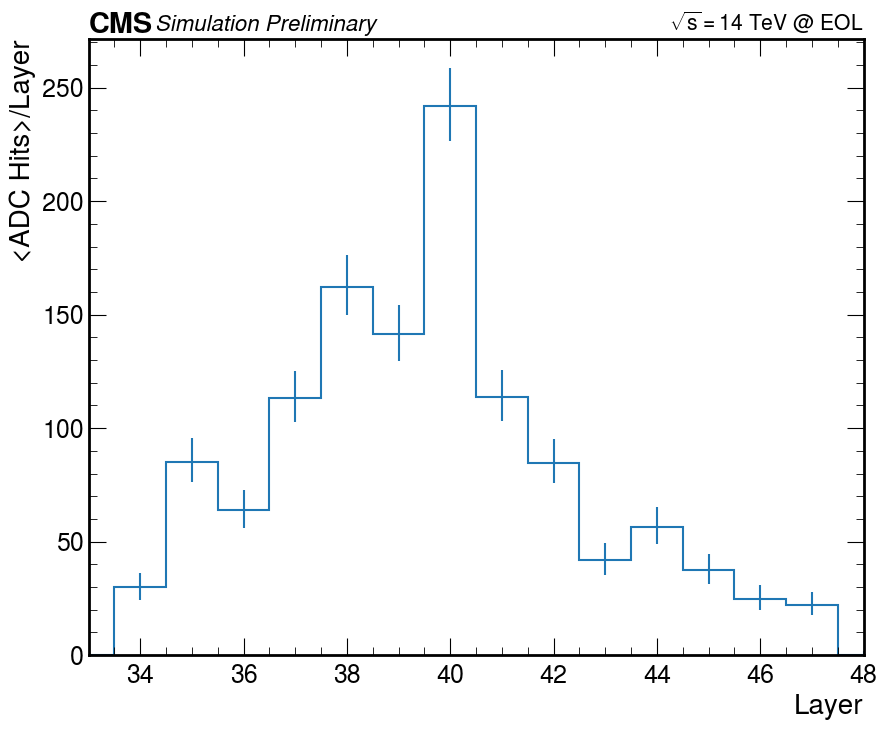

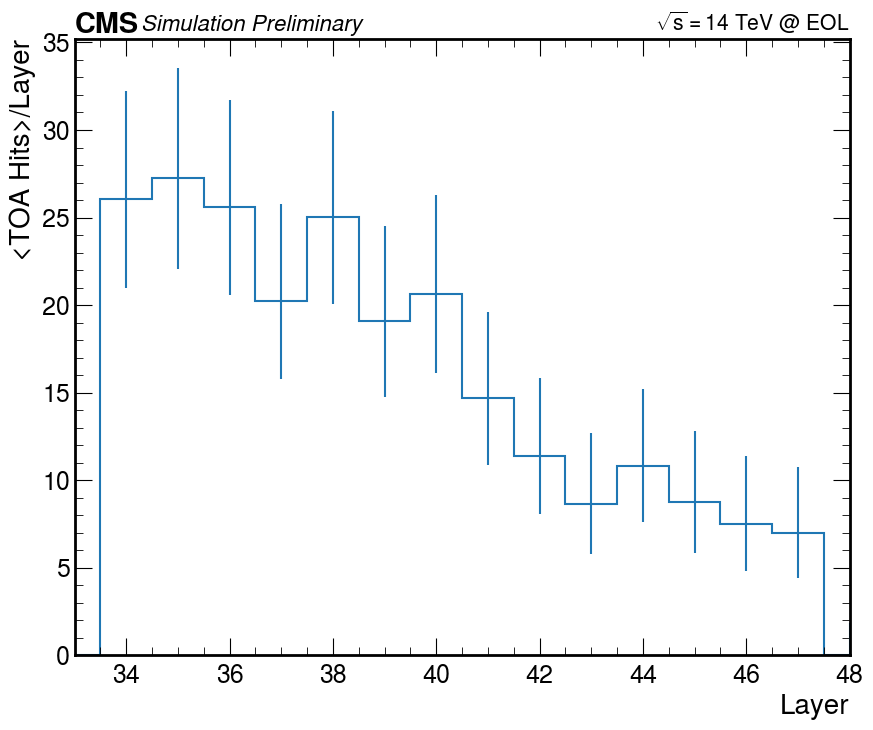

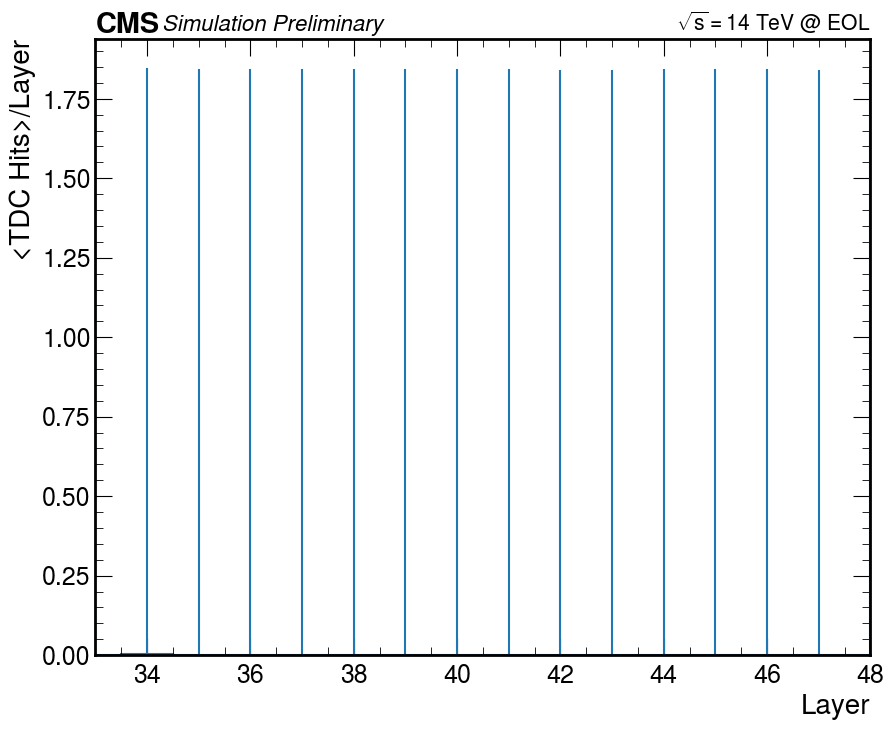

In [105]:
plotProfHist(hp_adccount, "<ADC Hits>/Layer",output_file_name="hp_adccount")
plotProfHist(hp_toacount, "<TOA Hits>/Layer",output_file_name="hp_toacount")
plotProfHist(hp_tdccount, "<TDC Hits>/Layer",output_file_name="hp_tdccount")
    

In [106]:
def plot1DHist(h_, var_,label=None,output_file_name=None):
    
    # get info from hist 
    values = h_.values()
    edges = h_.axis('x').edges()
    print(edges)
    errors = h_.errors()
    print(errors)

#     #plot
    fig, ax = plt.subplots(figsize=(10, 8))
#     hep.histplot(
#         values,
#         edges,
#         yerr=False,
#     )

    hep.histplot(
        values,
        bins=edges,
        yerr=True,
        xerr=True,
        color="#FF6347",
        histtype='errorbar',
        marker=".",
    )
#     # title
#     ax.set_title(
#        var_, #, L = 2.3 $fb^{-1}$; \n",
#        fontsize=20,
#     )

    # axes
    ax.set_ylabel(var_, fontsize=20)
    ax.set_xlabel("Layer", fontsize=20)
    ax.set_xlim(33, 48)
    #ax.set_ylim(0, 20)
    ax.tick_params(axis="both", labelsize=18) 

    # legend 
    #ax.legend(fontsize=15)
    
    # cms label
    hep.cms.label(
        "Preliminary",
        data=False,
        loc=0,
        ax=ax,
        rlabel="$\sqrt{s} = 14$ TeV "+simType,
        fontsize=16
    )
    
    # save output
    if output_file_name:
        plt.savefig(plot_dir+output_file_name+".pdf", bbox_inches="tight");


[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5]
[  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          57.54997828  62.35382907
  67.17142249  67.17142249  84.28523002  87.6356092  100.39920318
 100.39920318 100.39920318 100.39920318 109.10545358 109.10545358
 109.10545358 106.88311373   0.           0.           0.        ]


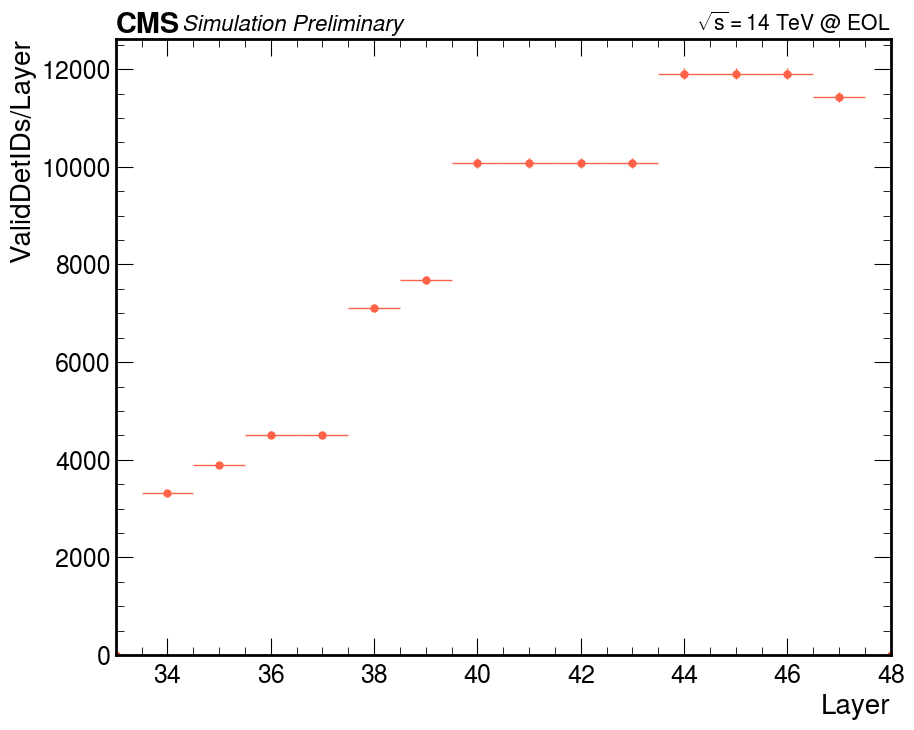

In [107]:
plot1DHist(h_cellcount, "ValidDetIDs/Layer",output_file_name="h_validDetId")